<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Line Charts**


Estimated time needed: **30** minutes


In this lab, you will focus on using line charts to analyze trends over time and across different categories in a dataset.



## Objectives


In this lab you will perform the following:


- Track trends in compensation across age groups and specific age ranges.

- Analyze job satisfaction trends based on experience level.

- Explore and interpret line charts to identify patterns and trends.


## Setup: Working with the Database
**Install the needed libraries**


In [1]:
!pip install pandas


In [2]:
!pip install matplotlib

**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



#### Step 1: Download the dataset


In [ ]:
# !wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv


#### Step 2: Import necessary libraries and load the dataset


In [8]:
import pandas as pd
import matplotlib.pyplot as plt


#### Load the data


In [10]:
df = pd.read_csv("survey_data_clean.csv")


#### Display the first few rows to understand the structure of the data


In [34]:
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,86155.287263,Unknown,Unknown,86155.287263,Unknown
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.000000,Unknown,Unknown,86155.287263,Unknown
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,86155.287263,Appropriate in length,Easy,86155.287263,Unknown
3,4,I am learning to code,18-24 years old,"Student, full-time","Hybrid (some remote, some in-person)",Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,86155.287263,Too long,Easy,86155.287263,Unknown
4,5,I am a developer by profession,18-24 years old,"Student, full-time","Hybrid (some remote, some in-person)",Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,86155.287263,Too short,Easy,86155.287263,Unknown


In [36]:
df['ConvertedCompYearly'].value_counts()

ConvertedCompYearly
86155.287263     42002
64444.000000       321
53703.000000       308
75184.000000       230
85925.000000       226
                 ...  
46145.000000         1
154440.000000        1
27391.000000         1
11562.000000         1
116844.000000        1
Name: count, Length: 6114, dtype: int64

### Task 1: Trends in Compensation Over Age Groups


##### 1. Line Chart of Median `ConvertedCompYearly` by Age Group


- Track how the median yearly compensation (ConvertedCompYearly) changes across different age groups.

- Use a line chart to visualize these trends.


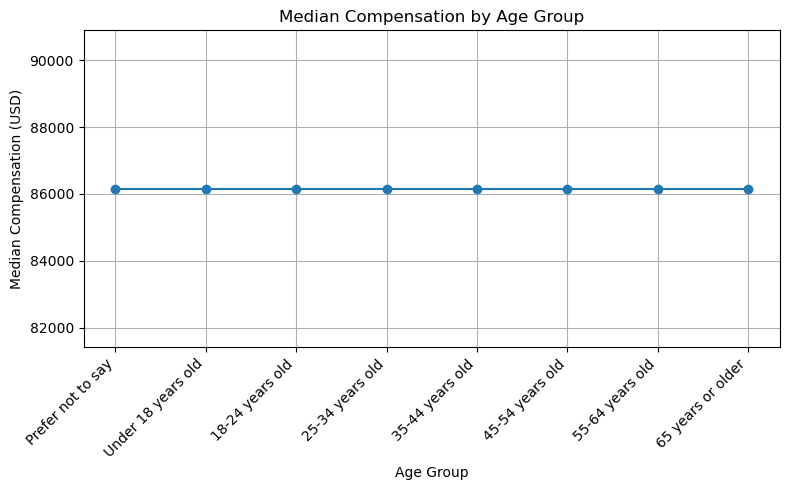

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# Drop rows with missing values in required columns
df_clean = df.dropna(subset=['Age', 'ConvertedCompYearly'])

# Group by age and calculate median compensation and satisfaction
grouped = df_clean.groupby('Age').agg({'ConvertedCompYearly': 'median'}).reset_index()


# Sort age categories manually for correct order
age_order = [
    'Prefer not to say',
    'Under 18 years old',
    '18-24 years old',
    '25-34 years old',
    '35-44 years old',
    '45-54 years old',
    '55-64 years old',
    '65 years or older'
]
grouped['Age'] = pd.Categorical(grouped['Age'], categories=age_order, ordered=True)
grouped = grouped.sort_values('Age')

# Set index for plotting
grouped.set_index('Age', inplace=True)



# Plot line chart
plt.figure(figsize=(8, 5))
plt.plot(grouped.index, grouped['ConvertedCompYearly'], marker='o', linestyle='-')

plt.title('Median Compensation by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median Compensation (USD)')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()




##### 2. Line Chart of Median `ConvertedCompYearly` for Ages 25 to 45


For a closer look, plot a line chart focusing on the median compensation for respondents between ages 25 and 45.


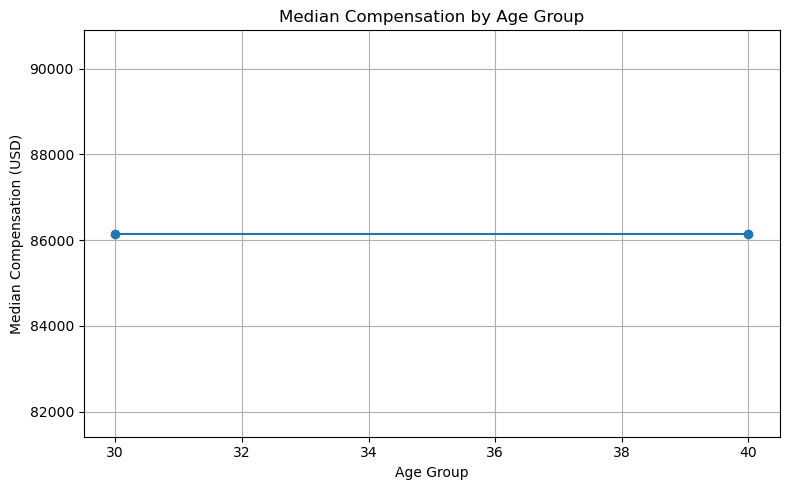

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

# Drop rows with missing values in required columns
df_clean = df.dropna(subset=['Age', 'ConvertedCompYearly'])


age_map = {
    'Under 18 years old': 16,
    '18-24 years old': 20,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70,
}
df_clean['AgeNumeric'] = df['Age'].map(age_map)


df_25_45  = df_clean[(df_clean['AgeNumeric'] >= 25) & (df_clean['AgeNumeric'] <= 45)]


# Group by age and calculate median compensation and satisfaction
grouped = df_25_45.groupby('AgeNumeric').agg({'ConvertedCompYearly': 'median'})


# Plot line chart
plt.figure(figsize=(8, 5))
plt.plot(grouped.index, grouped['ConvertedCompYearly'], marker='o', linestyle='-')

plt.title('Median Compensation by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median Compensation (USD)')

plt.grid(True)
plt.tight_layout()
plt.show()




### Task 2: Trends in Job Satisfaction by Experience Level



##### 1. Line Chart of Job Satisfaction (`JobSatPoints_6`) by Experience Level



- Use a column that approximates experience level to analyze how job satisfaction changes with experience.

- If needed, substitute an available experience-related column for `Experience`.


Step-by-Step Breakdown:

    Column of Interest – Job Satisfaction

        You’re using JobSatPoints_6, a numerical column that measures job satisfaction (probably on a scale like 0–100 or 1–10).

    Column for Experience Level

        Ideally, you'd use a column like "YearsCodePro" (years coding professionally), "YearsExp", or "YearsProfessionalExperience" depending on what's available in your dataset.

        These represent experience level, but if a clean categorical column (like "Entry", "Mid", "Senior") doesn't exist, you may need to:

            Use YearsCodePro, bin it into categories like:
            '0-2 yrs', '3-5 yrs', '6-10 yrs', '10+ yrs'

    Group and Aggregate

        Group the data by experience category

        Calculate the mean or median job satisfaction in each group

    Plot

        Use a line chart: X-axis = Experience category, Y-axis = Avg job satisfaction

C:\Users\serge\AppData\Local\Temp\ipykernel_10656\3345529991.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Mean_data = df_clean.groupby('ExperienceRange')['JobSatPoints_6'].mean().reset_index()


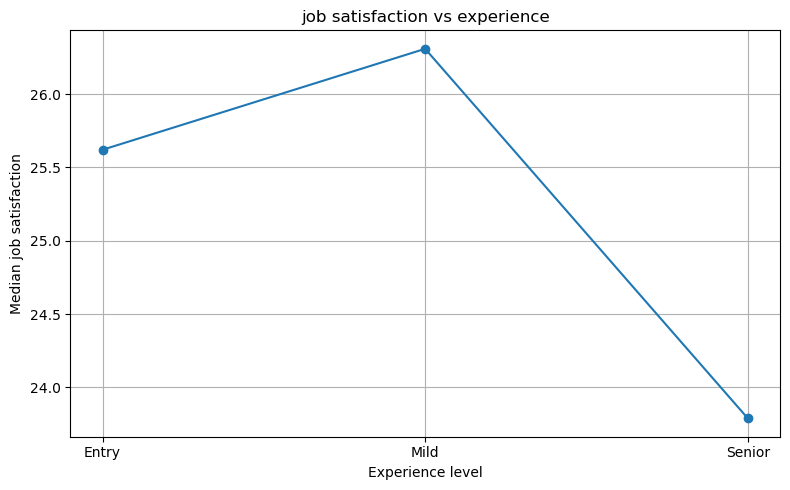

In [102]:
import pandas as pd
import matplotlib.pyplot as plt

# Drop rows with missing values in required columns
df_clean = df[['YearsCodePro', 'JobSatPoints_6']].dropna()

# Handle special cases before conversion
df_clean['YearsCodePro'] = clean_df['YearsCodePro'].replace({
    'Less than 1 year': 0.5,
    'More than 50 years': 51
})

# Now convert safely to number both columns
df_clean['YearsCodePro'] = pd.to_numeric(clean_df['YearsCodePro'], errors='coerce')
df_clean['JobSatPoints_6'] = pd.to_numeric(clean_df['JobSatPoints_6'], errors='coerce')

# Create bins for Experience 
bins2 = [0, 2, 5, 51]
labels2 = ['Entry', 'Mild', 'Senior']

# Assign satisfaction range
df_clean['ExperienceRange'] = pd.cut(df_clean['YearsCodePro'], bins=bins2, labels=labels2)


# Group by CompRange and JobSatPoints_6 and count
# stack_data = df_clean.groupby(['ExperienceRange', 'JobSatPoints_6']).size().unstack(fill_value=0)
Mean_data = df_clean.groupby('ExperienceRange')['JobSatPoints_6'].mean().reset_index()
Mean_data
# # # Set index for plotting
# Mean_data.set_index('ExperienceRange', inplace=True)
# Mean_data = df_clean.sort_index()
# Mean_data
# Plot line chart
plt.figure(figsize=(8, 5))
plt.plot(Mean_data['ExperienceRange'], Mean_data['JobSatPoints_6'], marker='o', linestyle='-')

plt.title('job satisfaction vs experience')
plt.xlabel('Experience level')
plt.ylabel('Median job satisfaction')

plt.grid(True)
plt.tight_layout()
plt.show()

### Task 3: Trends in Job Satisfaction and Compensation by Experience


##### 1.Line Chart of Median ConvertedCompYearly Over Experience Level

- This line chart will track how median compensation (`ConvertedCompYearly`) changes with increasing experience.

- Use a column such as `WorkExp` or another relevant experience-related column.


In [106]:
df['ConvertedCompYearly'].value_counts()

ConvertedCompYearly
86155.287263     42002
64444.000000       321
53703.000000       308
75184.000000       230
85925.000000       226
                 ...  
46145.000000         1
154440.000000        1
27391.000000         1
11562.000000         1
116844.000000        1
Name: count, Length: 6114, dtype: int64

C:\Users\serge\AppData\Local\Temp\ipykernel_10656\3187067454.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Mean_data = df_clean.groupby('ExperienceRange')['ConvertedCompYearly'].mean().reset_index()


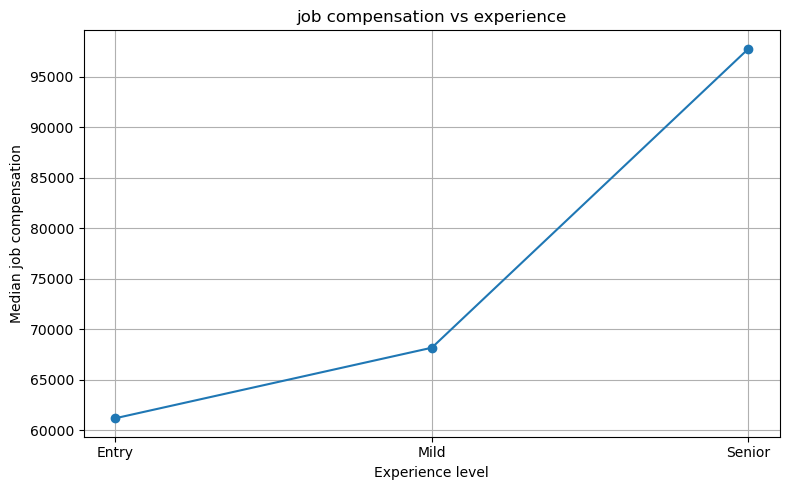

In [108]:
import pandas as pd
import matplotlib.pyplot as plt

# Drop rows with missing values in required columns
df_clean = df[['YearsCodePro', 'ConvertedCompYearly']].dropna()

# Handle special cases before conversion
df_clean['YearsCodePro'] = clean_df['YearsCodePro'].replace({
    'Less than 1 year': 0.5,
    'More than 50 years': 51
})

# Now convert safely to number both columns
df_clean['YearsCodePro'] = pd.to_numeric(df_clean['YearsCodePro'], errors='coerce')
df_clean['ConvertedCompYearly'] = pd.to_numeric(df_clean['ConvertedCompYearly'], errors='coerce')

# Create bins for Experience 
bins2 = [0, 2, 5, 51]
labels2 = ['Entry', 'Mild', 'Senior']

# Assign satisfaction range
df_clean['ExperienceRange'] = pd.cut(df_clean['YearsCodePro'], bins=bins2, labels=labels2)


# Group by CompRange and JobSatPoints_6 and count
# stack_data = df_clean.groupby(['ExperienceRange', 'JobSatPoints_6']).size().unstack(fill_value=0)
Mean_data = df_clean.groupby('ExperienceRange')['ConvertedCompYearly'].mean().reset_index()
Mean_data
# # # Set index for plotting
# Mean_data.set_index('ExperienceRange', inplace=True)
# Mean_data = df_clean.sort_index()
# Mean_data
# Plot line chart
plt.figure(figsize=(8, 5))
plt.plot(Mean_data['ExperienceRange'], Mean_data['ConvertedCompYearly'], marker='o', linestyle='-')

plt.title('job compensation vs experience')
plt.xlabel('Experience level')
plt.ylabel('Median job compensation')

plt.grid(True)
plt.tight_layout()
plt.show()

##### 2.Line Chart of Job Satisfaction (`JobSatPoints_6`) Across Experience Levels

- Create a line chart to explore trends in job satisfaction (`JobSatPoints_6`) based on experience level.

- This chart will provide insight into how satisfaction correlates with experience over time


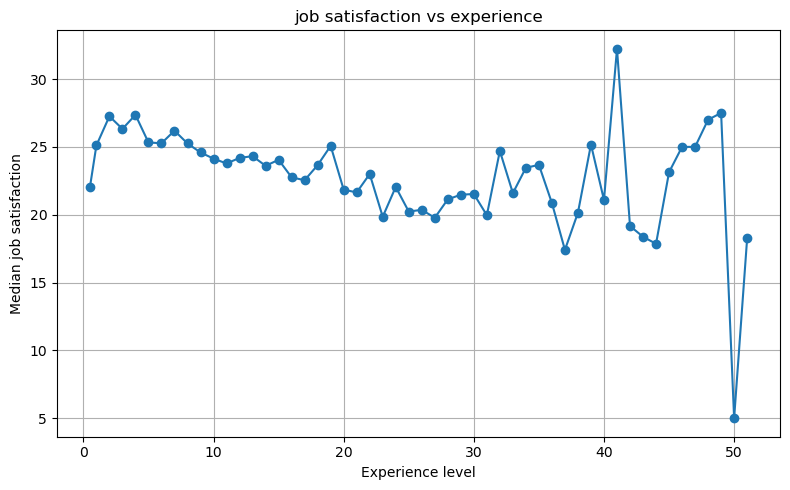

In [114]:
import pandas as pd
import matplotlib.pyplot as plt

# Drop rows with missing values in required columns
df_clean = df[['YearsCodePro', 'JobSatPoints_6']].dropna()

# Handle special cases before conversion
df_clean['YearsCodePro'] = clean_df['YearsCodePro'].replace({
    'Less than 1 year': 0.5,
    'More than 50 years': 51
})

# Now convert safely to number both columns
df_clean['YearsCodePro'] = pd.to_numeric(clean_df['YearsCodePro'], errors='coerce')
df_clean['JobSatPoints_6'] = pd.to_numeric(clean_df['JobSatPoints_6'], errors='coerce')

# # Create bins for Experience 
# bins2 = [0, 2, 5, 51]
# labels2 = ['Entry', 'Mild', 'Senior']

# # Assign satisfaction range
# df_clean['ExperienceRange'] = pd.cut(df_clean['YearsCodePro'], bins=bins2, labels=labels2)


# Group by CompRange and JobSatPoints_6 and count
# stack_data = df_clean.groupby(['ExperienceRange', 'JobSatPoints_6']).size().unstack(fill_value=0)
Mean_data = df_clean.groupby('YearsCodePro')['JobSatPoints_6'].mean().reset_index()
Mean_data
# # # Set index for plotting
# Mean_data.set_index('ExperienceRange', inplace=True)
# Mean_data = df_clean.sort_index()
# Mean_data
# Plot line chart
plt.figure(figsize=(8, 5))
plt.plot(Mean_data['YearsCodePro'], Mean_data['JobSatPoints_6'], marker='o', linestyle='-')

plt.title('job satisfaction vs experience')
plt.xlabel('Experience level')
plt.ylabel('Median job satisfaction')

plt.grid(True)
plt.tight_layout()
plt.show()

#### Final Step: Review


In this lab, you focused on analyzing trends in compensation and job satisfaction, specifically exploring how these metrics change with age and experience levels using line charts.


### Summary


In this lab, you explored essential data visualization techniques with a focus on analyzing trends using line charts. You learned to:

- Visualize the distribution of compensation across age groups to understand salary trends.

- Track changes in median compensation over various experience levels, identifying how earnings progress with experience.

- Examine trends in job satisfaction by experience, revealing how satisfaction varies throughout a developer's career.

These analyses allow for a deeper understanding of how factors like age and experience influence job satisfaction and compensation. By using line charts, you gained insights into continuous data patterns, which are invaluable for interpreting professional trends in the developer community.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
